<a href="https://colab.research.google.com/github/srikavya26/Credit-Default/blob/main/Copy_of_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Introduction

**Credit Default**

**Dataset** :
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

Default of Credit Card Clients Dataset (UCI Machine Learning Repository)

**Install Required Libraries**




**Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')


**Understanding the Dataset**

In [ ]:
df = pd.read_excel('default of credit card clients.xls', sheet_name='Data', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Exploratory Data Analysis**

In [ ]:
df.rename(columns={"default payment next month": "default"}, inplace=True)


In [ ]:
if "ID" in df.columns:
    df.drop(columns=["ID"], inplace=True)

categorical_cols = df.select_dtypes(include=["object"]).columns

if len(categorical_cols) > 0:
    print("\nEncoding categorical columns:", categorical_cols)
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

*Try 70,30 and 60,40 split for training and testing*

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)



In [ ]:
df = pd.concat([X, y], axis=1)

df.columns = [
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR',
    'BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
    'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
    'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
    'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
    'DEFAULT'
]

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())

Dataset shape: (30000, 24)

First few rows:
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEP  PAY_AUG  PAY_JUL  \
0      20000    2          2         1   24        2        2       -1   
1     120000    2          2         2   26       -1        2        0   
2      90000    2          2         2   34        0        0        0   
3      50000    2          2         1   37        0        0        0   
4      50000    1          2         1   57       -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -2  ...             0             0             0   
1        0        0  ...          3272          3455          3261   
2        0        0  ...         14331         14948         15549   
3        0        0  ...         28314         28959         29547   
4        0        0  ...         20940         19146         19131   

   PAY_AMT_SEP  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0            0      

In [ ]:
print("\n" + "="*60)
print("Dataset Summary")
print("="*60)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())



Dataset Summary

Data Types:
LIMIT_BAL       int64
SEX             int64
EDUCATION       int64
MARRIAGE        int64
AGE             int64
PAY_SEP         int64
PAY_AUG         int64
PAY_JUL         int64
PAY_JUN         int64
PAY_MAY         int64
PAY_APR         int64
BILL_AMT_SEP    int64
BILL_AMT_AUG    int64
BILL_AMT_JUL    int64
BILL_AMT_JUN    int64
BILL_AMT_MAY    int64
BILL_AMT_APR    int64
PAY_AMT_SEP     int64
PAY_AMT_AUG     int64
PAY_AMT_JUL     int64
PAY_AMT_JUN     int64
PAY_AMT_MAY     int64
PAY_AMT_APR     int64
DEFAULT         int64
dtype: object

Missing Values:
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_SEP         0
PAY_AUG         0
PAY_JUL         0
PAY_JUN         0
PAY_MAY         0
PAY_APR         0
BILL_AMT_SEP    0
BILL_AMT_AUG    0
BILL_AMT_JUL    0
BILL_AMT_JUN    0
BILL_AMT_MAY    0
BILL_AMT_APR    0
PAY_AMT_SEP     0
PAY_AMT_AUG     0
PAY_AMT_JUL     0
PAY_AMT_JUN     0
PAY_AMT_MAY     0
PAY_AMT_APR    


PAYMENT HISTORY ANALYSIS


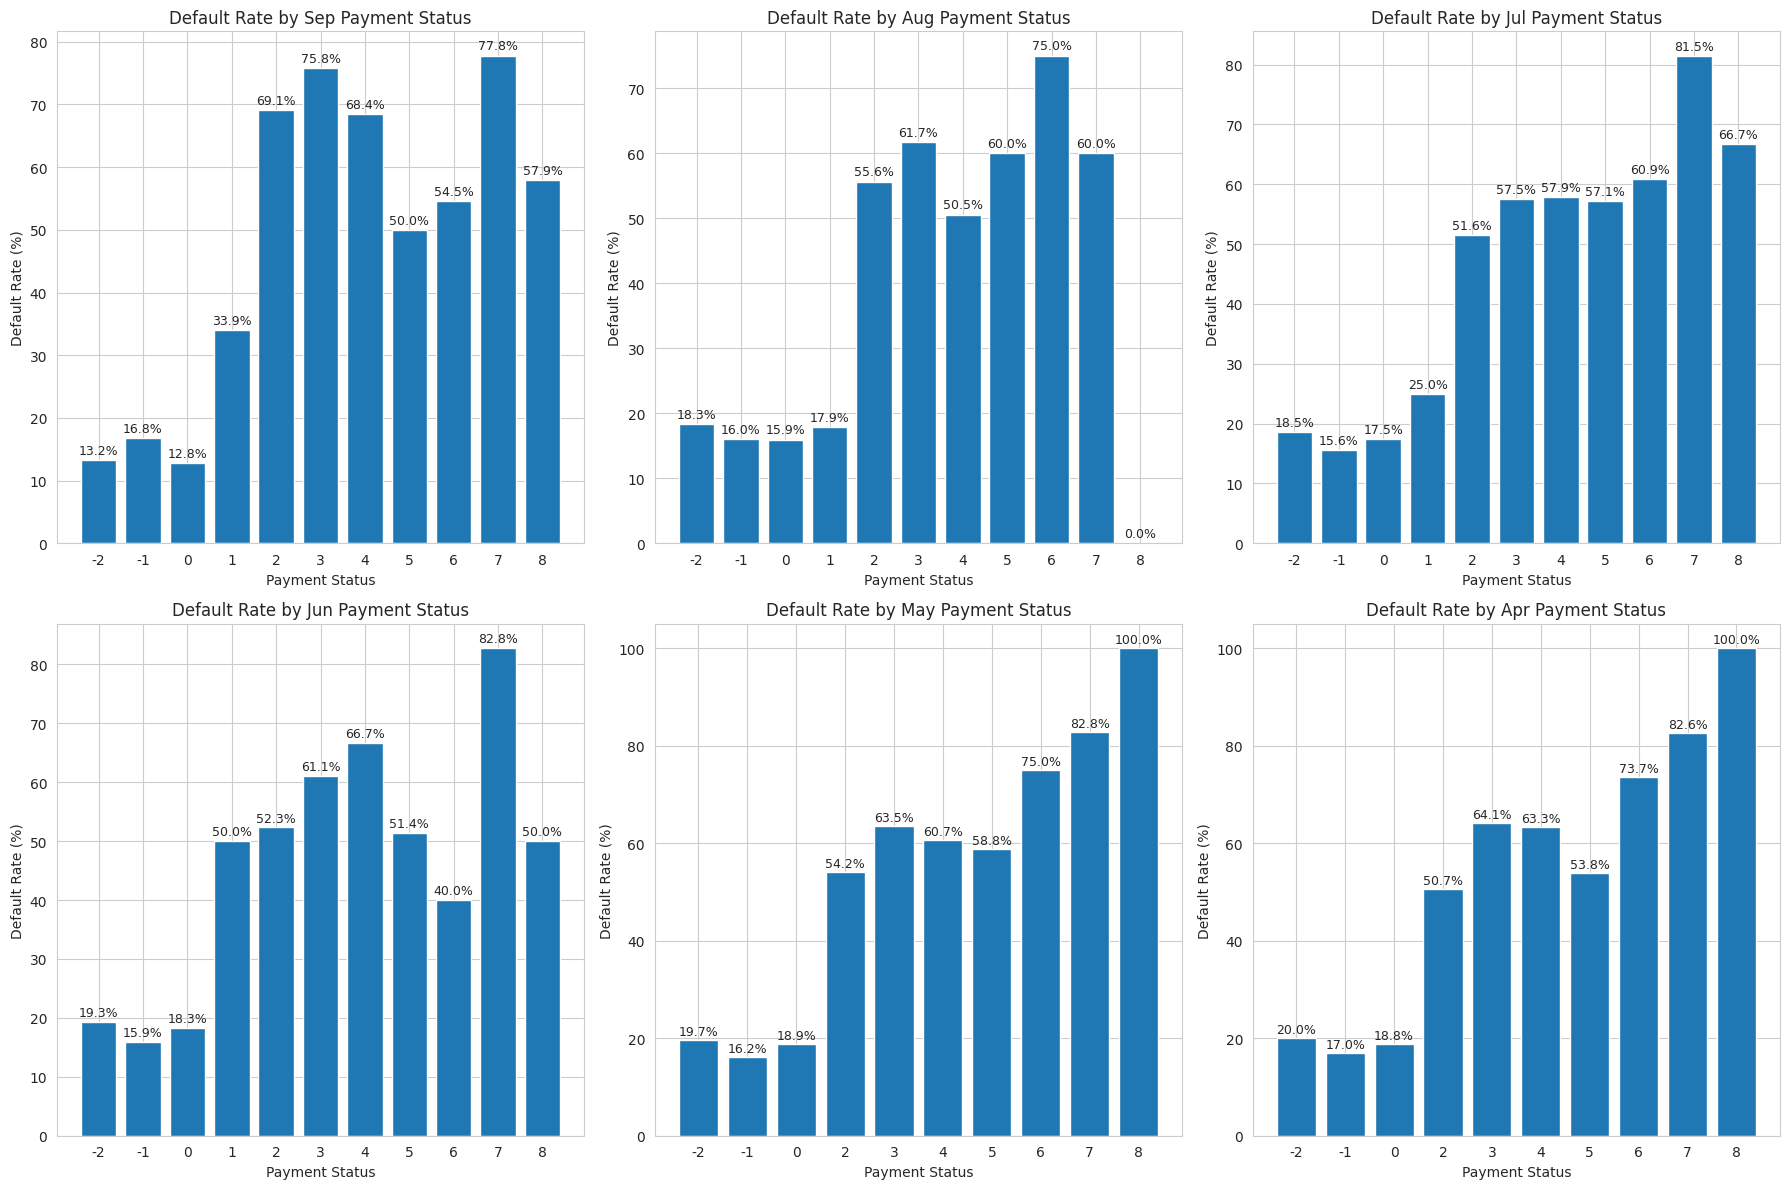

In [ ]:
# PAYMENT HISTORY ANALYSIS (Important FEATURES)
print("\n" + "="*60)
print("PAYMENT HISTORY ANALYSIS")
print("="*60)

# Payment status columns
pay_columns = ['PAY_SEP', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
months = ['Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (col, month) in enumerate(zip(pay_columns, months)):
    # Calculate default rate by payment status
    pay_default = df.groupby(col)['DEFAULT'].mean()

    axes[i].bar(pay_default.index.astype(str), pay_default.values * 100)
    axes[i].set_title(f'Default Rate by {month} Payment Status')
    axes[i].set_xlabel('Payment Status')
    axes[i].set_ylabel('Default Rate (%)')

    # Add value labels on top of bars
    for j, v in enumerate(pay_default.values):
        axes[i].text(j, v*100 + 1, f'{v:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()



BILL AND PAYMENT AMOUNTS TREND


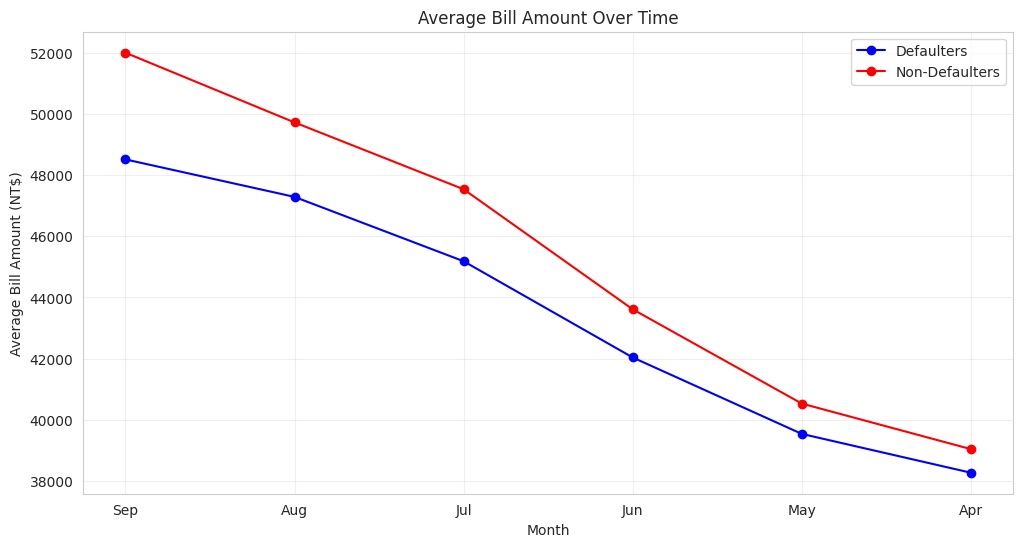

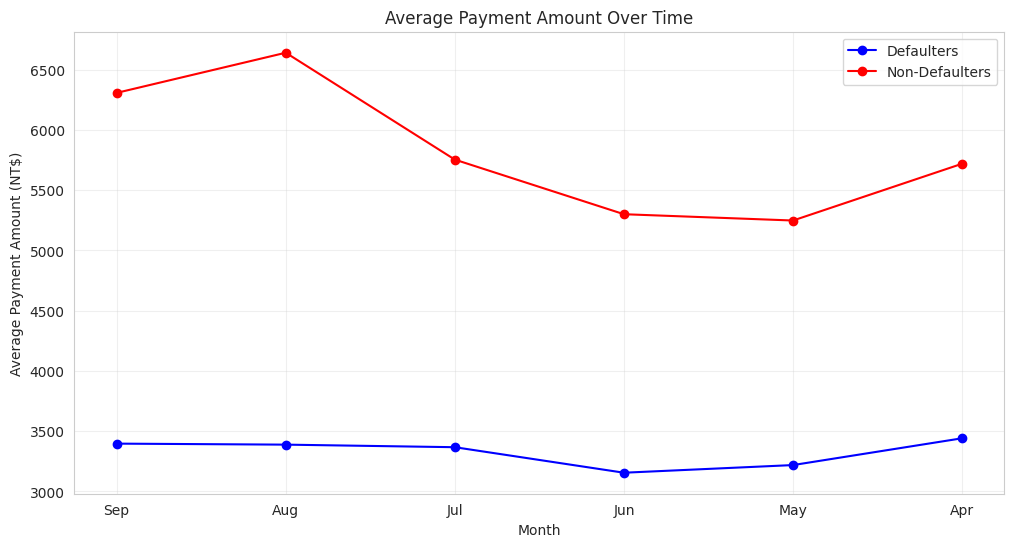

In [ ]:
print("\n" + "="*60)
print("BILL AND PAYMENT AMOUNTS TREND")
print("="*60)

# Bill amount columns september to April
bill_cols = ['BILL_AMT_SEP', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
             'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']

# Payment amount columns
pay_amt_cols = ['PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
                'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

# Average bill amount over time by default status
avg_bill_default = df[df['DEFAULT']==1][bill_cols].mean()
avg_bill_nondefault = df[df['DEFAULT']==0][bill_cols].mean()

plt.figure(figsize=(12,6))
plt.plot(months, avg_bill_default.values, marker='o', label='Defaulters', color='blue')
plt.plot(months, avg_bill_nondefault.values, marker='o', label='Non-Defaulters', color='red')
plt.title('Average Bill Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Average Bill Amount (NT$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Average payment amount over time by default status
avg_pay_default = df[df['DEFAULT']==1][pay_amt_cols].mean()
avg_pay_nondefault = df[df['DEFAULT']==0][pay_amt_cols].mean()

plt.figure(figsize=(12,6))
plt.plot(months, avg_pay_default.values, marker='o', label='Defaulters', color='blue')
plt.plot(months, avg_pay_nondefault.values, marker='o', label='Non-Defaulters', color='red')
plt.title('Average Payment Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Average Payment Amount (NT$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
print("\n" + "="*60)
print("KEY INSIGHTS SUMMARY")
print("="*60)

# Payment status analysis
print("\nPayment status codes explanation:")
print("-1 = Pay duly, 1 = 1 month delay, 2 = 2 months delay, ...")

# Default rate for critical payment statuses
print("\nDefault rates for critical payment statuses in September (PAY_SEP):")
for status in [-1, 0, 1, 2, 3]:
    count = df[df['PAY_SEP']==status].shape[0]
    default_rate = df[df['PAY_SEP']==status]['DEFAULT'].mean()
    if count > 0:
        print(f"Status {status}: {count} clients, default rate = {default_rate:.1%}")

# Credit limit comparison
avg_limit_default = df[df['DEFAULT']==1]['LIMIT_BAL'].mean()
avg_limit_nondefault = df[df['DEFAULT']==0]['LIMIT_BAL'].mean()
print(f"\nAverage credit limit:")
print(f"  Defaulters: NT${avg_limit_default:,.0f}")
print(f"  Non-defaulters: NT${avg_limit_nondefault:,.0f}")
print(f"  Ratio: {avg_limit_default/avg_limit_nondefault:.2f}")



KEY INSIGHTS SUMMARY

Payment status codes explanation:
-1 = Pay duly, 1 = 1 month delay, 2 = 2 months delay, ...

Default rates for critical payment statuses in September (PAY_SEP):
Status -1: 5686 clients, default rate = 16.8%
Status 0: 14737 clients, default rate = 12.8%
Status 1: 3688 clients, default rate = 33.9%
Status 2: 2667 clients, default rate = 69.1%
Status 3: 322 clients, default rate = 75.8%

Average credit limit:
  Defaulters: NT$130,110
  Non-defaulters: NT$178,100
  Ratio: 0.73


**Model - 1**

*Model-1 Metrics*

**Model - 2**

*Model-2 Metrics*

**Model - 3**


*Model-3 Metrics*



Imbalancee

**Model - 4**

*Model - 4 Metrics*

**Model - 5**

*Model-5 Metrics*

#*Evaluating Results*

#Conclusion